## Neural Network with one Hidden Layer

In [101]:
import torch
from torch import nn, optim
import matplotlib.pyplot as plt
import numpy as np
%matplotlib inline

In [102]:
def Plot_data(X, Y, model, epoch, leg=True):
    plt.plot(X.numpy(), model(X).detach().numpy(), label='epoch ' + str(epoch))
    plt.plot(X.numpy(), Y.numpy(), 'r')
    if leg:
        plt.legend()
    else:
        pass

In [141]:
class Net(nn.Module):
    def __init__(self, L1_in, L1_out, L2_out):
        super(Net, self).__init__()
        self.Seq1 = nn.Sequential(nn.Linear(L1_in, L1_out), nn.Sigmoid())
        self.Seq2 = nn.Sequential(nn.Linear(L1_out, L2_out), nn.Sigmoid())
        
    def forward(self, x):
        x = self.Seq1(x)
        x = self.Seq2(x)
        return x

In [150]:
def train_model(Y, X, model, optimizer, criterion, epochs=1000):
    cost = []
    epoch_loss = 0
    for epoch in range(epochs):
        epoch_loss = 0
        for y, x in zip(Y, X):
            y_hat = model(x)
            loss = criterion(y_hat, y)
            loss.backward()
            optimizer.step()
            optimizer.zero_grad()
            epoch_loss += loss.item()
        cost.append(epoch_loss)
    return cost

In [151]:
X = torch.arange(-20, 20, 1).view(-1, 1).type(torch.FloatTensor)
Y = torch.zeros(X.shape[0])
Y[(X[:, 0] > -4) & (X[:, 0] < 4)] = 1.0

In [152]:
def criterion(outputs, labels):
    return -1 * torch.mean(labels * torch.log(outputs) + (1 - labels) * torch.log(1 - outputs))

Text(0.5, 1.0, 'Cross Entropy Loss')

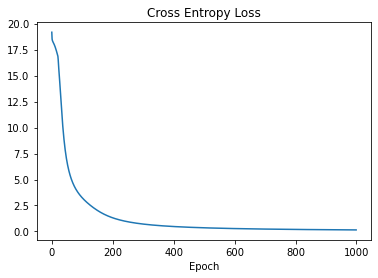

In [153]:
model = Net(1, 2, 1)
optimizer = optim.SGD(model.parameters(), lr=0.1)
cost_cross = train_model(Y, X, model, optimizer, criterion)

plt.plot(cost_cross)
plt.xlabel('Epoch')
plt.title('Cross Entropy Loss')

In [154]:
x = torch.tensor([0.0])
y_hat = model(x)
y_hat

tensor([0.9980], grad_fn=<SigmoidBackward>)

In [158]:
# Practice: Train the model with MSE Loss Function
criterion = nn.MSELoss()
practice_model = Net(1, 2, 1)
prac_optim = optim.SGD(practice_model.parameters(), lr=0.1)

cost = train_model(Y, X, practice_model, prac_optim, criterion)
model.state_dict()

OrderedDict([('Seq1.0.weight',
              tensor([[-2.6949],
                      [-2.6298]])),
             ('Seq1.0.bias', tensor([ 9.3867, -9.3297])),
             ('Seq2.0.weight', tensor([[ 12.6922, -13.2355]])),
             ('Seq2.0.bias', tensor([-6.4751]))])

In [159]:
y_hat = model(torch.tensor([-3.0]))
y_hat

tensor([0.9755], grad_fn=<SigmoidBackward>)